> Note: Please read Question 17 at the end of this document carefully before you start your work! You will need to provide a detailed discussion of how you used GenAI for this assignment so make sure to keep notes, create screenshots, etc. so you keep track of your “discussions” as you go through each question.

> Note: Please also review the assignment PDF in this assignment. That document has the most details about what you are expected to do to complete this individual assignment. Good luck! 

# Tuango - Targeting Mobile App Messages

Prepare "Tuango: Targeting Mobile Push Messages" for class discussion and as an individual assignment and submit the assignment through GitHub. Detailed instructions are available on Canvas (tuango.pdf). See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

See the assignment on Canvas for the "invitation" to get the repo. Once you accepted the invitation, you should see the repo at the page below.

<https://github.com/rady-msba>

Add code and your answers for all questions to the tuango.ipynb. When you are done with this individual assignment, save your code and commit and push the results to GitHub. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push repos.

https://youtu.be/w6yzFv44CMc 

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Note that your python code must be fully "reproducible". That is, your code must without errors on my (or the TAs) computer. There are will not be any explicit tests for this assignment to confirm if your answers are (not) correct. However, the system will run your code and it is important to check that there is a green checkmark rather than a red X. See .github/workflows/run-code.yml for the configuration. 

If you get a red X, that means your code did not run without errors and that there are things for you the check and fix. When you are done, submit the link to your repo to Canvas. To help you get started, review the logistic regression examples available using the command below. Focus on the bbb-logistic example.

usethis "https://www.dropbox.com/sh/af6t2nvca610d13/AAAtJSph3kyajjd9698MJ1zIa?dl=1"

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. This includes using cloud storage like Google Drive. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom. Any suspected violation will be reported to the Academic Integrity Office for review.

## Setup

Please complete this python notebook by answering the questions 1-16 in `tuango-msba.pdf`. The code blocks below will load a few python modules you will need and also the data you will need for this first notebook. As you will see, you will also need to create a second notebook called `tuango-post.ipynb`.

> Hint: Make sure to study the reading on "Applied Logistic Regression using Pyrsm and Radiant-for-Python" which has examples on how to run logistic regression models using the PYRSM package

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import pyrsm as rsm
import seaborn as sn1

# you can import additional python packages but only use packages that
# are already part of the docker container

In [2]:
# increase plot resolution
mpl.rcParams["figure.dpi"] = 100

In [3]:
!pip install --upgrade pyrsm

In [4]:
# check that you have version 0.9.10 of pyrsm or newer
rsm.__version__

'0.9.7'

## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

In [5]:
# Use this dataset and notebook to answer questions 1-13
tuango = pd.read_parquet("data/tuango_pre.parquet")

In [6]:
print(tuango)

           userid buyer  ordersize  recency  frequency    monetary  age  \
0       U15889344    no        0.0      309        7.0   39.799999   44   
1       U60246497    no        0.0      297        8.0   39.799999   80   
2       U22965759    no        0.0      295        1.0   72.900002   59   
3       U40811142    no        0.0      277        1.0   40.000000   37   
4       U76283952    no        0.0      259        1.0   21.000000   43   
...           ...   ...        ...      ...        ...         ...  ...   
418155  U83013842   NaN        NaN       19        4.0  128.000000   25   
418156  U45426448   NaN        NaN      131        2.0  110.740000   20   
418157  U48935927   NaN        NaN       53        1.0  126.000000   71   
418158  U94568595   NaN        NaN       12        4.0   98.000000   64   
418159  U20558740   NaN        NaN       10        3.0  260.000000   34   

       gender music  training  test  
0           F   yes       0.0     1  
1           M   yes    

In [7]:
tuango.dtypes

userid         object
buyer        category
ordersize     float64
recency         int32
frequency     float64
monetary      float64
age             int32
gender       category
music        category
training      float64
test            int32
dtype: object

In [8]:
# feel free to use polars instead of pandas if you prefer
# but you will need to ajust some of the sample code below 
# to make it work
# tuango = pl.read_parquet("data/tuango_pre.parquet")

In [9]:
# dataset description
tuango_description = rsm.md("data/tuango_pre_description.md")

# Tuango: Targeting Mobile App Push Messages

This file contains information about the test and does not have results about the roll-out. Values for `buyer` and `ordersize` are missing for all customers that were not part of the test.

## Variable Names and Descriptions
* userid: Unique user ID

**Response to the customized push message**
* buyer: Did the customer buy the Karaoke deal? ("yes" or "no")
* ordersize: Number of 30-minute Karaoke sessions the customer purchased

**Recency, Frequency, and Monetary variables**
* recency: Days since last purchase of a deal (before the Karaoke deal offer)
* frequency: Number of deals purchased during the one year period before the Karaoke deal offer
* monetary: Average amount spent per order (in RMB) during the one year period before the Karaoke deal offer

**Other variables in the dataset**
* age: Age of the customer
* gender: Gender identity of the customer (M = male, F = female, O = Other or unknown)
* music: Customer made a purchase in the music category during the one-year period before the Karaoke deal offer ("no" or "yes")
* test: Splits the dataset into test (1) and rollout (0) data
* training: Splits the dataset into training (1) and test (0) data. This variable will not be used in this assignment

In [10]:
# you will likely find the below useful in this assignment
# (i.e., there are missing values in the data that you will need to deal with)
tuango.buyer.value_counts(dropna=False)

buyer
NaN    397252
no      18888
yes      2020
Name: count, dtype: int64

In [11]:
# you will likely find the below useful in this assignment
tuango.buyer.isna().value_counts()

buyer
True     397252
False     20908
Name: count, dtype: int64

In [12]:
# create a variable called 'buyer_yes' that has value 1 when buyer == 'yes', has value 0 when buyer == 'no' and has value np.nan when buyer.isna() is True
tuango["buyer_yes"] = tuango.buyer.map({"yes": 1, "no": 0, np.nan: np.nan})

# you can check that you have this set up correctly using the command below
tuango.buyer_yes.value_counts(dropna=False)

buyer_yes
NaN    397252
0.0     18888
1.0      2020
Name: count, dtype: int64

## Part I:  Preliminary Analysis

### Question 1

What percentage of customers responded to the deal offer message (i.e., bought the deal)?

In [13]:
# insert calculation code here
# the result should be expressed as a percentage as a string with 2 decimal 
# places and assigned to q1 (e.g., q1 = '5.43%')

response_rate = tuango.buyer.value_counts(normalize=True)["yes"] * 100
q1 = f"{response_rate:.2f}%"
print(q1)

9.66%


### Question 2

What was the average number of sessions purchased by customers that bought one or more 30-minute sessions? Use the ordersize variable for your calculation.

Create a pivot table with count, mean and std. deviation of `ordersize` by `buyer`

In [14]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and 
# (3) the standard deviation in ordersize for yes and no responses

## Filtering Purchased Customers: Firstly, we select only those customers who have made a purchase, indicated by 'yes' in the 'buyer' column. This step ensures that we are considering only relevant data for customers who actually bought the karaoke deal.
purchased_customers = tuango[tuango["buyer"] == "yes"]

##  Calculating Average Order Size: Next, we calculate the average number of karaoke sessions (ordersize) bought by these customers. This gives us the average number of 30-minute sessions purchased by customers who responded positively to the deal.
average_sessions = purchased_customers["ordersize"].mean()

## Creating a Pivot Table: To provide a comprehensive view, we create a pivot table for both 'yes' and 'no' responses in the 'buyer' column. This table includes the count, mean, and standard deviation of the ordersize. It helps to understand the distribution and central tendency of ordersize among both groups who purchased and did not purchase the karaoke deal.
q2 = tuango.pivot_table(values="ordersize", index="buyer", aggfunc=["count", "mean", "std"])


# the below should show your result
# do not apply any rounding to your answer
q2.loc["yes", "mean"]

ordersize    3.941089
Name: yes, dtype: float64

## Part II: Building Targeting Models
### Question 3

Estimate a logistic regression model using buyer as the dependent variable (target) and, recency, frequency, monetary, age, gender, and music as the explanatory variables (features)

No plot will be created for userid (type object)


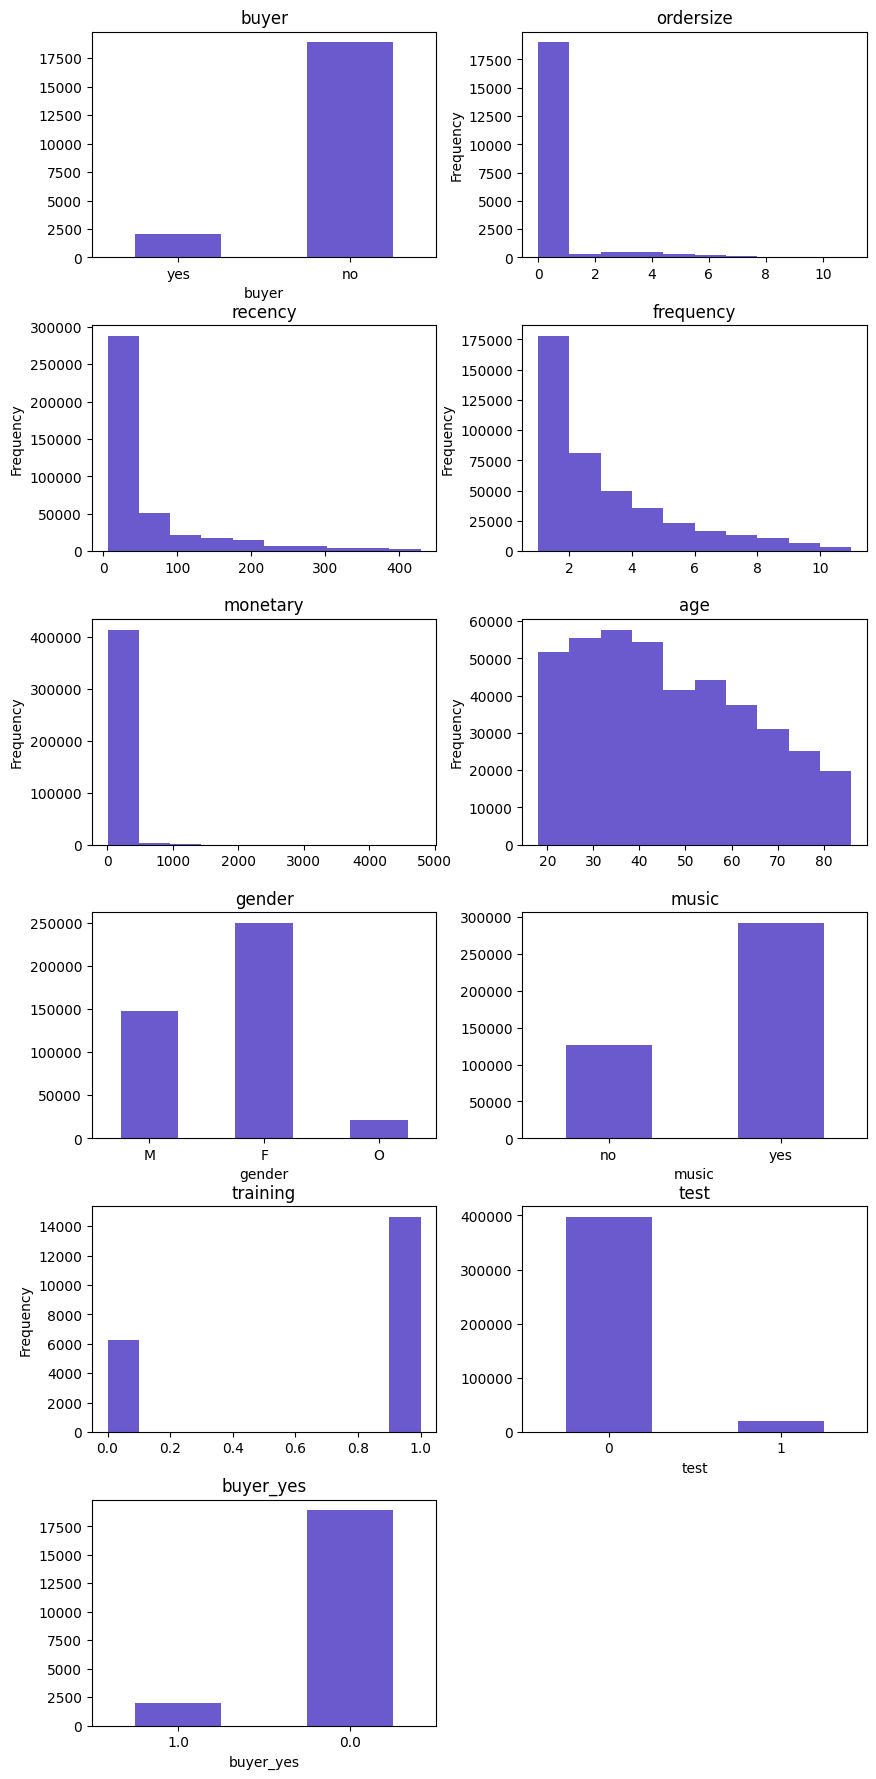

In [15]:
rsm.distr_plot(tuango)

In [16]:
lr = rsm.model.logistic(
    data={"tuango":
          tuango[tuango['buyer'].notna()]},
    rvar="buyer",
    lev="yes",
    evar=[
        "recency",
        "frequency",
        "monetary",
        "age",
        "gender",
        "music"
    ],
)
lr.summary()


Logistic regression (GLM)
Data                 : tuango
Response variable    : buyer
Level                : yes
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: There is no effect of x on buyer
Alt. hyp.: There is an effect of x on buyer

               OR     OR%  coefficient  std.error  z.value p.value     
Intercept   0.051  -94.9%        -2.98      0.097  -30.768  < .001  ***
gender[F]   1.731   73.1%         0.55      0.054   10.073  < .001  ***
gender[O]   1.078    7.8%         0.07      0.128    0.584   0.559     
music[yes]  1.908   90.8%         0.65      0.059   10.912  < .001  ***
recency     0.999   -0.1%        -0.00      0.000   -3.292  < .001  ***
frequency   1.114   11.4%         0.11      0.010   10.861  < .001  ***
monetary    1.002    0.2%         0.00      0.000   12.499  < .001  ***
age         0.988   -1.2%        -0.01      0.001   -9.115  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squar

### Question 4

Create Prediction plots for all explanatory variables. Describe the effect of each explanatory variable on the probability that a customer will purchase the karaoke deal

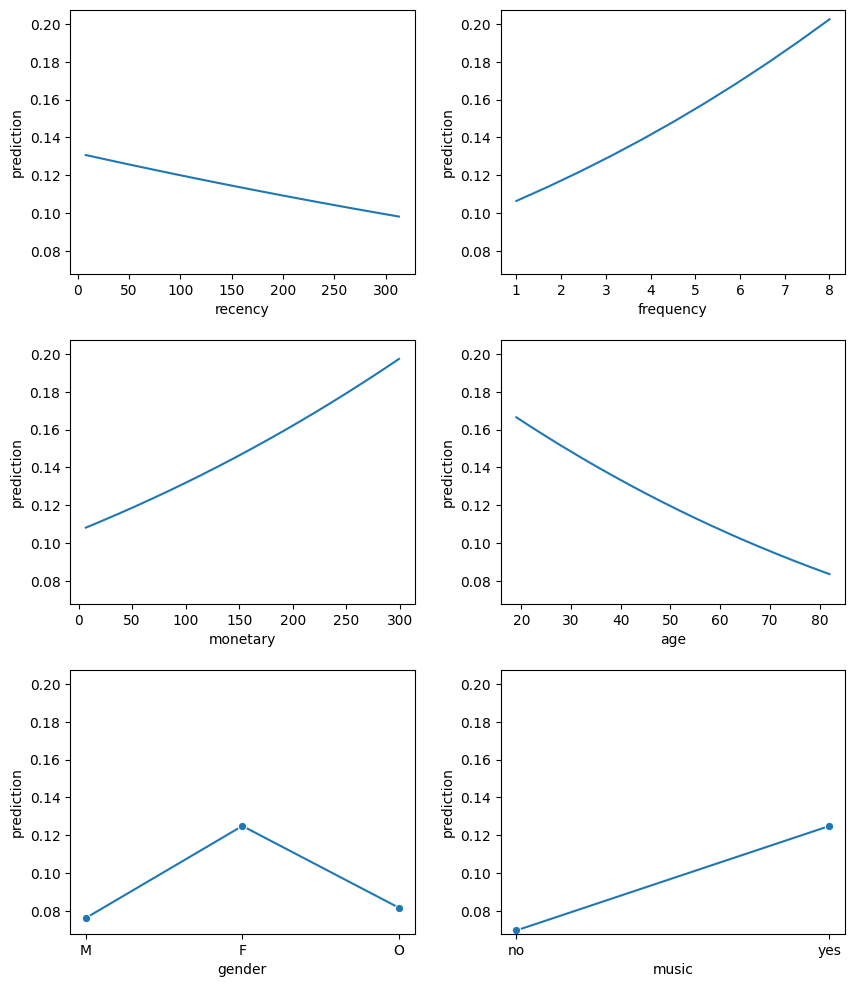

In [17]:
lr.plot("pred")

Recency: The likelihood of purchasing the karaoke deal slightly decreases as the time since the last purchase increases. This suggests that customers who have made purchases more recently are more likely to engage in new deals.

Frequency: There is a positive correlation between the frequency of transactions and the probability of purchasing the karaoke deal. Customers who make purchases more frequently are more likely to be interested in new deals.

Monetary: The higher the average amount spent in past transactions, the higher the probability that a customer will purchase the karaoke deal. This indicates that customers who spend more may be more interested in additional deals.

Age: The probability of purchasing the karaoke deal seems to decrease slightly with age. This might indicate that younger customers are more interested in such deals.

Gender: Male customers (M) have a slightly lower probability of purchasing the karaoke deal compared to female customers (F), and those of other or unknown gender (O) have an even lower probability. Gender may influence customer preferences for the karaoke deal.

Music: Customers with a history of purchasing in the music category in the past year (yes) have a higher probability of purchasing the karaoke deal than those without such a history (no). This suggests that customers interested in music are more likely to be interested in the karaoke deal.

### Question 5

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

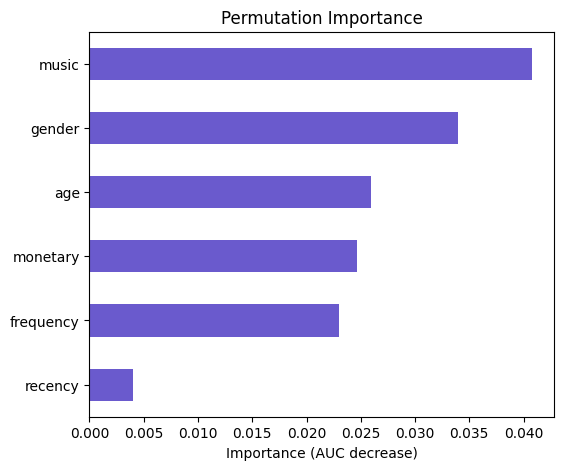

In [18]:
lr.plot("vimp")

'music' is the most influential predictors in the model.

### Question 6

Add the predicted values from the logistic regression to the "tuango" DataFrame. Use "pred_logit" as the variable name. Compare the average of the predicted values to the overall response rate (i.e., percentage of buyers). What do you notice when you do this calculation using only the data used to estimate the model? Explain.

In [19]:
tuango["pred_logit"] = lr.predict(data=tuango)["prediction"]

avg_pred = tuango["pred_logit"].mean()

tuango["buyer_yes_numeric"] = tuango["buyer_yes"].astype(float)

overall_response_rate = tuango["buyer_yes_numeric"].mean()

print("Average of predicted values:", avg_pred)
print("Overall response rate:", overall_response_rate)


Average of predicted values: 0.0965999134185302
Overall response rate: 0.09661373636885402


This model performs well: It does a good job on the training data, accurately predicting customer purchasing behavior.

No overfitting: The model doesn't overfit to the specifics of the training data; its predictions align with actual outcomes.

Further validation needed: Despite good performance on the training data, I should test the model on a new set (test set) to ensure it works well with different data.

### Question 7

Estimate a linear regression model using "ordersize" as the response variable and recency, frequency, monetary, age, gender, and music as the explanatory variables. Estimate this regression using only those customers who placed an order after the deal offer message. Describe why you think it does (not) make sense to focus on this group of customers.

In [20]:
tuango_orders = tuango[tuango['ordersize'] > 0]

reg = rsm.model.regress(
    data={'tuango_orders' : tuango_orders}, 
    rvar="ordersize", 
    evar=[
        "recency",
        "frequency",
        "monetary",
        "age",
        "gender",
        "music",
    ]
)
reg.summary()

Linear regression (OLS)
Data                 : tuango_orders
Response variable    : ordersize
Explanatory variables: recency, frequency, monetary, age, gender, music
Null hyp.: the effect of x on ordersize is zero
Alt. hyp.: the effect of x on ordersize is not zero

            coefficient  std.error  t.value p.value     
Intercept          3.67      0.174   21.104  < .001  ***
gender[F]          0.13      0.089    1.425   0.154     
gender[O]          0.26      0.208    1.243   0.214     
music[yes]         0.02      0.097    0.255   0.799     
recency            0.00      0.001    0.591   0.555     
frequency          0.02      0.016    1.456   0.145     
monetary           0.00      0.000    1.035   0.301     
age                0.00      0.003    0.389   0.697     

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.003, Adjusted R-squared: -0.0
F-statistic: 0.939 df(7, 2012), p.value 0.475
Nr obs: 2,020


Reasonable Justifications:

Behavioral Data is More Relevant: The group of customers in question has already demonstrated an interest in the specific deal, confirmed by their purchase behavior. Analyzing this group can help us better understand the factors that influence the magnitude of purchases.

Improved Targeting: Understanding the characteristics of customers who have already engaged in a transaction can help Tuango more precisely target those likely to generate larger orders.

Optimization of Marketing Resources: By analyzing this specific group of customers, Tuango can optimize their marketing resources to focus on those who are more likely to make larger responses to future deals.

Unreasonable Justifications:

Potential Sample Bias: Focusing only on customers who have already made a purchase might lead to biased analytical results, as it overlooks those who may have been influenced by other factors not to buy.

Potential Variable Interference: There could be other variables not considered in the model that affect customer purchasing behavior and order size.

Limited Variability: If there is not much variability in ordersize among the purchasing customers (i.e., most people bought a similar number of sessions), the regression model using ordersize as a response variable might not show strong explanatory power.

### Question 8

Use Permutation Importance to assess variable importance. Which variables seem to be most important in the model?

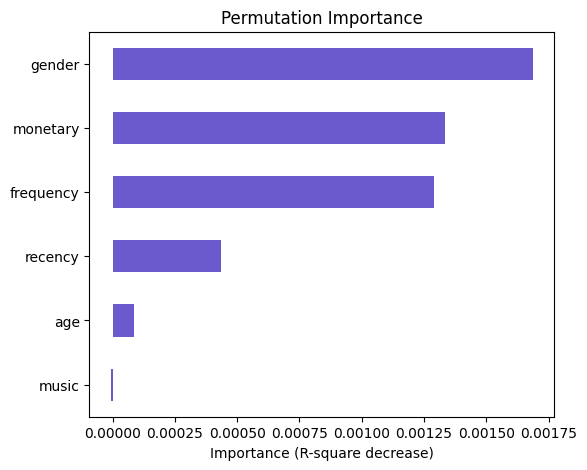

In [21]:
reg.plot("vimp")

### Question 9

What do the linear regression model results suggest about our ability to predict ordersize for customers who responded to the deal?


Low R-squared Value: The extremely low R-squared value (0.003) indicates that the chosen explanatory variables (recency, frequency, monetary, age, gender, and music preferences) almost do not explain the variation in ordersize. This means that the model fails to effectively capture the key factors that influence ordersize.

Lack of Statistical Significance of Variables: The p-values for most explanatory variables show that they do not significantly impact ordersize, further suggesting that these variables are not the key determinants of ordersize.

Results from Permutation Importance Analysis: According to the permutation importance analysis, even the variables with the highest importance have a relatively small impact on the model's predictive power. This indicates that our model might not accurately capture the variables that influence ordersize.

### Question 10

Add the predicted values from the linear regression to the "tuango" data.frame. Compare the average of the predicted values to the average value of ordersize. Make sure to focus only on buyers. What do you notice?

In [22]:
# Use the linear regression model to predict order sizes and add the predicted values to the tuango DataFrame
# Assuming 'reg' is your fitted linear regression model and 'tuango_orders' is the DataFrame with appropriate features
tuango['predicted_ordersize'] = reg.predict(tuango_orders)['prediction']

# Filter out the buyers, and calculate the average of the predicted order sizes
# This step focuses only on those customers who have made a purchase ('buyer' == 'yes')
average_predicted_ordersize = tuango[tuango['buyer'] == 'yes']['predicted_ordersize'].mean()

# Calculate the average actual order size for buyers
# This computes the mean of the actual order sizes for customers who made a purchase
average_actual_ordersize = tuango[tuango['buyer'] == 'yes']['ordersize'].mean()

# Print the results for comparison
# This will help in assessing how well the model's predictions align with the actual data for buyers
print("Average predicted order size for buyers:", average_predicted_ordersize)
print("Average actual order size for buyers:", average_actual_ordersize)

Average predicted order size for buyers: 3.941089108910902
Average actual order size for buyers: 3.9410891089108913


## Part III: Profitability Analysis
### Question 11

What is the breakeven response rate? Use the average ordersize from question 2 in your revenue calculations.

In [23]:
# state your assumptions that are relevant to calculate 
# the breakeven response rate
# breakeven should be of type `float`

# Set our assumptions for the calculation
cost_per_response = 9  # The marginal cost to send out each deal offer message is 9 RMB
price_per_session = 49  # The price for each 30-minute karaoke session is 49 RMB
tuangos_fee_rate = 0.50  # Tuango charges a fee that is 50% of the sales revenue for each deal sold

# Use the average order size from Question 2 to calculate the average revenue per order
average_ordersize = q2.loc["yes", "mean"]  # q2 is the result previously obtained from the pivot_table
average_revenue_per_order = average_ordersize * price_per_session

# Calculate the average profit per order
average_margin_per_order = average_revenue_per_order * tuangos_fee_rate

# Calculate the breakeven response rate
breakeven_response_rate = cost_per_response / average_margin_per_order

# Output the result
q11 = breakeven_response_rate

print(q11)


ordersize    0.093209
Name: yes, dtype: float64


In [24]:
print(average_ordersize)

ordersize    3.941089
Name: yes, dtype: float64


### Question 12

What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 397,252 remaining customers (i.e., target everyone)?

In [25]:
# Assuming 'average_ordersize' from Q2 and 'price_per_session' are available
# Assuming 'breakeven_response_rate' from Q11 is the expected response rate
# Assuming 'cost_per_response' is the cost of sending a single message

# Total number of customers to target
total_customers = 397252

# Calculate the total cost of sending messages to all customers
message_cost_all = cost_per_response * total_customers

# Estimate the total number of positive responses based on the breakeven response rate
nr_responses_all = overall_response_rate * total_customers

# Calculate the total revenue in RMB
revenue_all = nr_responses_all * average_ordersize * price_per_session

# Calculate Tuango's profit in RMB (assuming Tuango gets a 50% cut of the revenue)
profit_all = 0.5 * revenue_all - message_cost_all

# Calculate the Return on Marketing Expenditures (ROME) as a proportion
ROME_all = profit_all / message_cost_all

# Print out the results
print("Projected profit (RMB):", profit_all)
print("Return on Marketing Expenditures (ROME):", ROME_all)


Projected profit (RMB): ordersize    130577.5
Name: yes, dtype: float64
Return on Marketing Expenditures (ROME): ordersize    0.036522
Name: yes, dtype: float64


### Question 13

Evaluate the performance implications of offering the deal to only those customers (out of 397,252) with a predicted probability of purchase greater than the breakeven response rate. Determine the projected profit in RMB and the return on marketing expenditures both approaches.

Note: Fine tune your estimate from Q2 above by determining the average amount spent among the people that (1) will receive a message and (2) bought a karaoke deal. Also, use the actual number of messages you plan to send out to the group of customers in the rollout sample (i.e., "test == 0")

In [26]:
breakeven_response_rate = float(breakeven_response_rate)

/var/folders/vs/v6pvkjqn0dj7_nhrdxc4hxtc0000gn/T/ipykernel_86877/2401928024.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  breakeven_response_rate = float(breakeven_response_rate)


In [27]:
tuango_cleaned = tuango.dropna(subset=["buyer_yes"]).copy()

print(tuango_cleaned)


          userid buyer  ordersize  recency  frequency    monetary  age gender  \
0      U15889344    no        0.0      309        7.0   39.799999   44      F   
1      U60246497    no        0.0      297        8.0   39.799999   80      M   
2      U22965759    no        0.0      295        1.0   72.900002   59      F   
3      U40811142    no        0.0      277        1.0   40.000000   37      F   
4      U76283952    no        0.0      259        1.0   21.000000   43      F   
...          ...   ...        ...      ...        ...         ...  ...    ...   
20903  U20475633    no        0.0      118        4.0   18.710001   73      F   
20904  U51354565    no        0.0      118        3.0   92.450000   38      F   
20905  U69360423    no        0.0      117        4.0   51.140000   30      F   
20906  U48889214    no        0.0      117        4.0  162.110006   42      F   
20907  U28718785    no        0.0      116        1.0   59.840000   39      O   

      music  training  test

In [28]:
predict = tuango[tuango['buyer_yes'].isna()].reset_index(drop=True)
predictions=lr.predict(predict)['prediction']

In [29]:
# Filter customers whose predicted probability of purchase is greater than the breakeven response rate
tuango_cleaned["message_logit"] = tuango["pred_logit"] > breakeven_response_rate

# Further filter to select customers who meet the above condition and actually made a purchase
target_customers = tuango_cleaned[(tuango_cleaned["message_logit"]) & (tuango_cleaned["buyer_yes"] == 1)]

# Calculate the total number of messages that would be sent out (i.e., the total number of customers with a predicted probability above the breakeven response rate)
nr_message_logit = (predictions>breakeven_response_rate).sum()

# Calculate the total cost of sending messages to the selected customers
message_cost_logit = cost_per_response * nr_message_logit

num_buyeryes_message1 = len(tuango_cleaned[(tuango_cleaned['message_logit'])& (tuango_cleaned['buyer_yes'] ==1)])
message_logit_1 = len(tuango_cleaned[tuango_cleaned['message_logit']])
response_rate= num_buyeryes_message1/message_logit_1

# Total number of positive responses (i.e., the number of customers who actually made a purchase)
nr_responses_logit = nr_message_logit*response_rate
print(nr_responses_logit)

average_ordersize2 = tuango_cleaned[(tuango_cleaned['buyer_yes'] == 1) & (tuango_cleaned['message_logit'])]['ordersize'].mean()
print(average_ordersize2)

# Calculate the total revenue in RMB
revenue_logit = nr_responses_logit * average_ordersize2 * price_per_session
print(revenue_logit)

# Calculate the profit (assuming Tuango takes a 50% cut of the revenue)
profit_logit = 0.5 * revenue_logit - message_cost_logit

# Calculate the Return on Marketing Expenditures (ROME) as a proportion
ROME_logit = profit_logit / message_cost_logit

# Print the results
print("Projected profit with logistic targeting (RMB):", profit_logit)
print("Return on Marketing Expenditures with logistic targeting (ROME):", ROME_logit)


25172.789513760472
3.9699021820917983
4896742.088980746
Projected profit with logistic targeting (RMB): 881237.0444903732
Return on Marketing Expenditures with logistic targeting (ROME): 0.5623239904758452


### Question 14

Create a bar chart with profit information for the analyses conducted in questions 12 and 13

<Figure size 640x480 with 0 Axes>

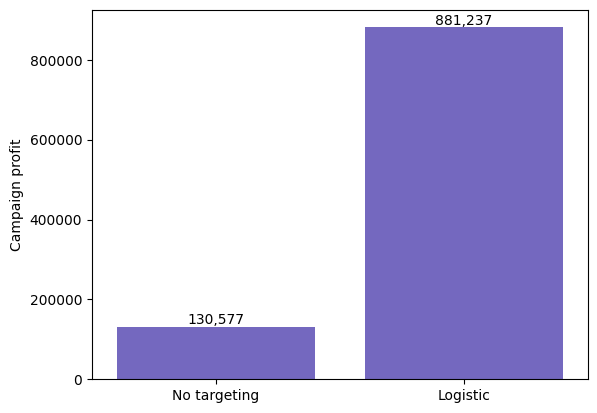

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming profit_all and profit_logit are from Q12 and Q13 respectively
# Similarly, assuming ROME_all and ROME_logit are also from Q12 and Q13
# Replace these with the actual calculated values from your analysis

profit_all = 130577.5  # Replace with actual value from Q12
profit_logit = 881237.0444903732  # Replace with actual value from Q13
ROME_all = 0.036522  # Replace with actual value from Q12
ROME_logit = 0.5623239904758452  # Replace with actual value from Q13

# Creating a DataFrame with the performance data
performance_data = pd.DataFrame(
    {
        "name": ["No targeting", "Logistic"],
        "Profit": [profit_all, profit_logit],
        "ROME": [ROME_all, ROME_logit],
    }
)

# Creating a bar plot for Profit
plt.clf()
fig, ax = plt.subplots()
sns.barplot(x="name", y="Profit", color="slateblue", data=performance_data, ax=ax)
ax.set(xlabel="", ylabel="Campaign profit")

# We iterate over the bars in the barplot and place the text at the top of the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height()):,}',
        ha='center',
        va='bottom',
        color='black'
    )

plt.show()


### Question 15

Create a bar chart with ROME for the analyses conducted in questions 12 and 13

<Figure size 640x480 with 0 Axes>

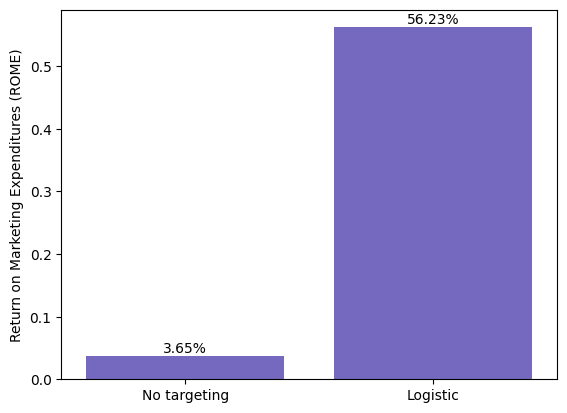

In [31]:
plt.clf()
fig, ax = plt.subplots()
sns.barplot(x="name", y="ROME", color="slateblue", data=performance_data, ax=ax)
ax.set(xlabel="", ylabel="Return on Marketing Expenditures (ROME)")

# We iterate over the bars in the barplot and place the text at the top of the bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.001,  # A small positive number to offset the text above the bar
        f"{round((100*bar.get_height()), 2):,}%",
        ha='center',
        va='bottom',
        color='black'
    )

plt.show()

### Question 16

You also have access to a dataset with the results from the deal offer roll-out (tuango_post.parquet). Tuango decided to contact all remaining 397,252 customers because this would provide data that could be used to evaluate different targeting approaches. The data has a "test" variable (test = 1 for the data used in the test, test = 0 for the remaining customers). You can use this variable to help evaluate the actual performance for the targeting approaches evaluated in questions 12 and 13. Re-create the plots from question 14 and 15 based on this new dataset.

Copy your tuango-pre.ipynb file to a new file tuango-post.ipynb. Instead of using the tuango_pre.parquet data, load tuango_post.parquet. You should be able to re-use most of your code and text. Calculate the actual performance for both targeting approach on the 'roll out' sample (i.e., test == 0).

Hint 1: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., test == 0) when calculating the break-even response rate etc. for targeting.

Hint 2: You have the actual data on what happened in the "post" data. Use that information to calculate performance (i.e., do not "project" the performance like you had to do for questions 12 and 13).



### Question 17

Please describe how you used Generative AI-tools like ChatGPT to support your work on this assignment. Provide pdfs and/or screenshots of your “discussions” with these tools and comment on what things did and did not go well. Also add any questions you may have about the assignment and the support you received from GenAI so we can discuss these topics in class.

Note: No matter how you used Generative AI-tools, you will be expected to fully understand all elements of the assignment. You may be called on in class to walk us through your thought process and how different parts of your code work. 




In this assignment, I primarily utilized ChatGPT in the following scenarios:

1. Code Explanation: While reviewing the BBB logistic example, I encountered some codes that were unclear to me. I sought ChatGPT's help for explanations.

2. Debugging: When I encountered errors in my code, I used ChatGPT to assist in debugging.

3. Code Refinement for Visual Representation: For Questions 14 and 15, I asked ChatGPT to modify my code to enhance the aesthetic appeal of my chart outputs.

Strengths:

1. Code Generation and Debugging: 

-ChatGPT was adept at generating functional code snippets that were instrumental in addressing specific data processing and analysis challenges.
-During debugging, ChatGPT provided effective suggestions that helped me quickly identify and resolve errors in my code.

2. Theoretical Explanation and Concept Clarification:

-ChatGPT offered detailed and comprehensible explanations of statistical and machine learning theories, aiding in my better understanding of the analytical methodologies.

Areas of Improvement:

1. Lack of Contextual Understanding:

-While ChatGPT excelled in code generation, at times it lacked deep understanding of the specific project context. Consequently, the generated code often required adjustments based on the specifics of my data set and personal judgment.

2. Constrained by Existing Knowledge:

-ChatGPT's advice and knowledge are based on its training data. Hence, it might not provide the latest information in the face of recent technological advancements or specific field research. For instance, ChatGPT was not familiar with the PyRSM package used by Rady, reflecting its limitations in current and specialized knowledge areas.
